<a href="https://colab.research.google.com/github/thanhlamnguyen/do_an_PTDL_Python/blob/main/Thong_ke_mo_ta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import csv
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [56]:
data = pd.read_csv('Inc_Exp_Data.csv')
data.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


Tính định lượng

In [34]:
dinh_luong = {}
columns_dinh_luong = ['Mthly_HH_Income', 'Mthly_HH_Expense', 'Emi_or_Rent_Amt', 'Annual_HH_Income']

In [35]:
# Tính định lượng của cột Mthly_HH_Income
print(data.describe() ['Mthly_HH_Income'])

count        50.000000
mean      41558.000000
std       26097.908979
min        5000.000000
25%       23550.000000
50%       35000.000000
75%       50375.000000
max      100000.000000
Name: Mthly_HH_Income, dtype: float64


In [36]:
# Tính định lượng của cột Mthly_HH_Expense
print(data.describe() ['Mthly_HH_Expense'])

count       50.000000
mean     18818.000000
std      12090.216824
min       2000.000000
25%      10000.000000
50%      15500.000000
75%      25000.000000
max      50000.000000
Name: Mthly_HH_Expense, dtype: float64


In [37]:
# Tính định lương của cột Emi_or_Rent_Amt
print(data.describe()['Emi_or_Rent_Amt'])

count       50.000000
mean      3060.000000
std       6241.434948
min          0.000000
25%          0.000000
50%          0.000000
75%       3500.000000
max      35000.000000
Name: Emi_or_Rent_Amt, dtype: float64


In [38]:
# Tính định lượng của cột Annual_HH_Income
print(data.describe()['Annual_HH_Income'])

count    5.000000e+01
mean     4.900190e+05
std      3.201358e+05
min      6.420000e+04
25%      2.587500e+05
50%      4.474200e+05
75%      5.947200e+05
max      1.404000e+06
Name: Annual_HH_Income, dtype: float64


Tính định tính

In [39]:
dinh_tinh = {}
columns_dinh_tinh = ['No_of_Fly_Members', 'Highest_Qualified_Member', 'No_of_Earning_Members']
for column in columns_dinh_tinh:
      dinh_tinh[column] = data[column]
    

In [40]:
# Định tính của cột No_of_Fly_Members
data['No_of_Fly_Members'].value_counts()

4    15
6    10
3     9
2     8
5     5
7     2
1     1
Name: No_of_Fly_Members, dtype: int64

In [41]:
# Định tính của cột No_of_Earning_Members
data['No_of_Earning_Members'].value_counts()

1    33
2    12
3     4
4     1
Name: No_of_Earning_Members, dtype: int64

In [42]:
# Định tính của cột Highest_Qualified_Member
data['Highest_Qualified_Member'].describe()

count           50
unique           5
top       Graduate
freq            19
Name: Highest_Qualified_Member, dtype: object

Vẽ biểu đồ


In [57]:
data_dinh_luong = data[['Mthly_HH_Income', 'Mthly_HH_Expense', 'Emi_or_Rent_Amt', 'Annual_HH_Income']]

In [58]:
data_dinh_tinh = pd.DataFrame(dinh_tinh)

Vẽ biểu đồ cho kiểu dữ liệu định tính

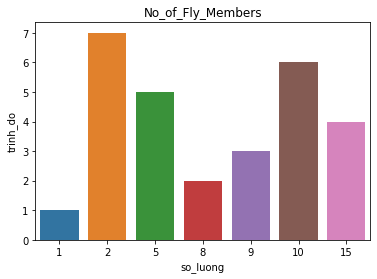

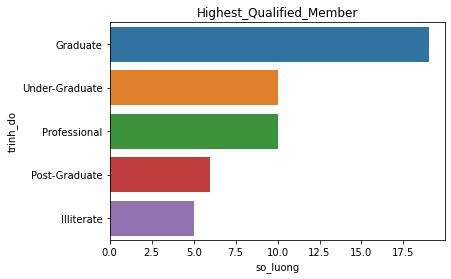

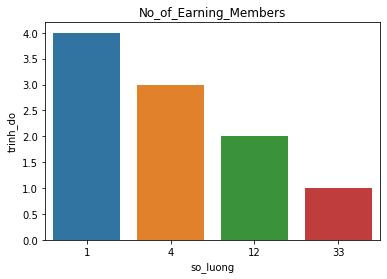

In [45]:
for column in data_dinh_tinh.columns:
    p = {}
    so_luong = []
    #print(data_dinh_tinh[column].value_counts())
    dem_data = data_dinh_tinh[column].value_counts()
    trinh_do = dem_data.index
    for i in dem_data:
        so_luong.append(i)
    p = {'trinh_do':trinh_do, 'so_luong':so_luong}
    data = pd.DataFrame(p)
    plt.title(column)
    sns.barplot(y = 'trinh_do', x= 'so_luong', data = data)
    plt.show()  

In [48]:
data_dinh_tinh_2 = data[['No_of_Fly_Members','No_of_Earning_Members']]

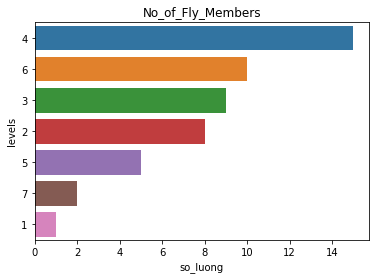

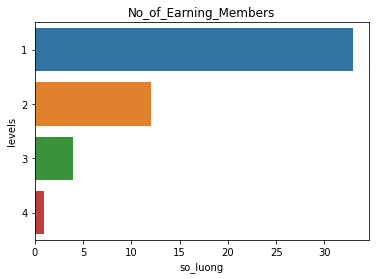

In [49]:
for column in data_dinh_tinh_2.columns:
    p = {}
    so_luong = []
    levels = []
    #print(data_dinh_tinh[column].value_counts())
    dem_data = data_dinh_tinh_2[column].value_counts()
    levels_0 = dem_data.index
    for level in levels_0:
        levels.append(str(level))
    for i in dem_data:
        so_luong.append(i)
    p = {'levels':levels, 'so_luong':so_luong}
    data = pd.DataFrame(p)
    plt.title(column)
    sns.barplot(y = 'levels', x = 'so_luong', data = data)
    plt.show()

Vẽ biểu đồ cho kiểu dữ liệu định lượng

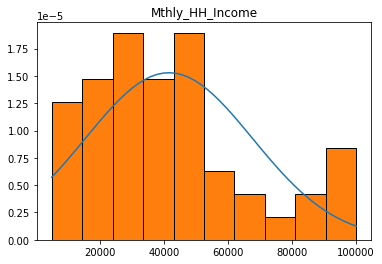

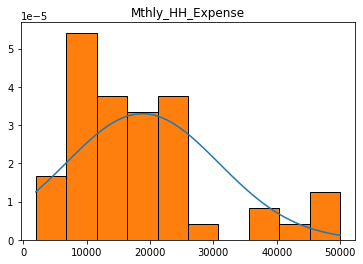

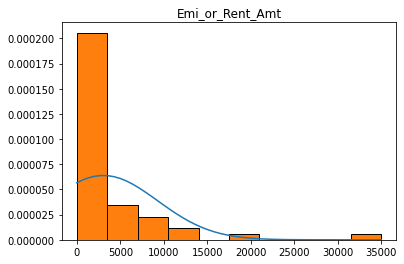

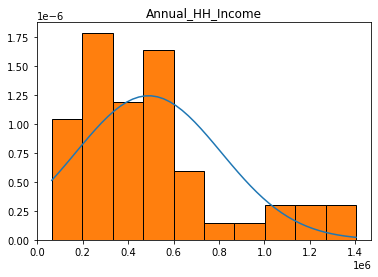

In [59]:
for column in data_dinh_luong.columns:
    data = data_dinh_luong[column]
    mean = np.mean(data)
    std = np.std(data,ddof=1)
    domain = np.linspace(np.min(data),np.max(data))
    plt.plot(domain, stats.norm.pdf(domain, mean, std))
    plt.hist(data, edgecolor='black', density = True)
    plt.title(column)
    plt.show()